evaluating mode choice for SBB

In [1]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [2]:
# read text files 

df_benchmark = pd.read_csv("run-id.EOD.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
df_zero = pd.read_csv("run-id_Zero.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
df_current = pd.read_csv("run-id_current.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
df_reactive = pd.read_csv("run-id_reactive.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
df_equilibrium = pd.read_csv("run-id.EWD.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
#df_lineTen_ca = pd.read_csv("bInputPA_SBB_project_lineTen_ca05.28.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
df_line11 = pd.read_csv("run-id_line11.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)

df_IncCap_20 = pd.read_csv("run-id_incCap_20_WD_.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
df_IncCap_20_equi = pd.read_csv("run-id.20.equi.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)

#df_EOD_20 = pd.read_csv("bInputPA_EOD_20%_equi08.17.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
#df_EOD_100 = pd.read_csv("bInputPA_EOD_100%_equi08.17.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)

df_IncCap = pd.read_csv("run-id_incCap_100_WD_.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)
df_IncCap_100_equi = pd.read_csv("run-id.100.wd.equ.tripModeAnalysis_.csv", sep=";", error_bad_lines=False, index_col =None)

#line11_after4
#df_IncCap_wD_100_equi = pd.read_csv("bInputPA_SBB_project_line11_after406.10.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)
#line11_after4 = pd.read_csv("line11_after4.person_info_all_transport_modes.csv", sep=";", error_bad_lines=False, index_col =None)



#line11
#df_IncCap_WD_20_equi = pd.read_csv("bInputPA_SBB_project_line11_WD_06.10.ScorePerActivityPerLegDetailed.csv", sep=";", error_bad_lines=False, index_col =None)



In [3]:
df_benchmark.head()

,mode,number of trips,trip share
0,car,15446,0.329030
1,transit_walk,17072,0.363667
2,walk,12937,0.275584
3,bike,1489,0.031719


In [4]:
df_benchmark.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
df_benchmark.columns

Index(['mode ', ' number of trips ', ' trip share '], dtype='object')

In [6]:
print(df_benchmark.index.name)

None


In [7]:
df_benchmark.index

RangeIndex(start=0, stop=4, step=1)

In [8]:
print (" this dataframe has a size of {}".format(len(df_benchmark)))
df_benchmark.head()

 this dataframe has a size of 4


,mode,number of trips,trip share
0,car,15446,0.329030
1,transit_walk,17072,0.363667
2,walk,12937,0.275584
3,bike,1489,0.031719


In [9]:
df_zero.head()

,mode,number of trips,trip share
0,car,15446,0.329030
1,transit_walk,17072,0.363667
2,walk,12937,0.275584
3,bike,1489,0.031719


In [10]:
df_current.head()

,mode,number of trips,trip share
0,car,15446,0.329030
1,transit_walk,17072,0.363667
2,walk,12937,0.275584
3,bike,1489,0.031719


In [11]:
df_benchmark= df_benchmark[["mode "," number of trips "]]
df_zero= df_zero[["mode "," number of trips "]]
df_current= df_current[["mode "," number of trips "]]
df_reactive= df_reactive[["mode "," number of trips "]]
df_equilibrium= df_equilibrium[["mode "," number of trips "]]
#df_lineTen_ca= df_lineTen_ca[["person Id","trip no.","mode","travel time (trip) [sec]"]]
df_line11= df_line11[["mode "," number of trips "]]
df_IncCap_20= df_IncCap_20[["mode "," number of trips "]]
df_IncCap_20_equi= df_IncCap_20_equi[["mode "," number of trips "]]
df_IncCap= df_IncCap[["mode "," number of trips "]]
df_IncCap_100_equi= df_IncCap_100_equi[["mode "," number of trips "]]

In [12]:
#df_lineTen_ca,
for scenario in [df_benchmark,df_zero,df_current,df_reactive,df_equilibrium,
                 df_line11,df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]:
        #scenario["person Id"].astype(str)
        #scenario.drop(scenario[~scenario["person Id"].str.isdigit()].index, inplace=True)
        scenario.rename(columns={'mode ':'mode', ' number of trips ':'number of trips'},inplace=True)
        #scenario.reset_index(drop=True, inplace = True)

In [13]:
df_benchmark.head(3)

,mode,number of trips
0,car,15446
1,transit_walk,17072
2,walk,12937


In [14]:
#df_benchmark = df_benchmark[df_benchmark["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_benchmark = df_benchmark.add_suffix("_EOD").rename(columns={"mode_EOD": "mode"})
df_benchmark.head()

,mode,number of trips_EOD
0,car,15446
1,transit_walk,17072
2,walk,12937
3,bike,1489


In [15]:
#df_reactive = df_reactive[df_reactive["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_reactive = df_reactive.add_suffix("_start of disruption").rename(columns={"mode_start of disruption": "mode"})
df_reactive.head()

,mode,number of trips_start of disruption
0,car,15446
1,transit_walk,17072
2,walk,12937
3,bike,1489


In [16]:
#df_IncCap = df_IncCap[df_IncCap["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap = df_IncCap.add_suffix("_IncCap").rename(columns={"mode_IncCap": "mode"})
df_IncCap.head()

,mode,number of trips_IncCap
0,car,14340
1,transit_walk,17958
2,walk,13700
3,bike,946


In [17]:
#df_IncCap_100_equi = df_IncCap_100_equi[df_IncCap_100_equi["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_100_equi = df_IncCap_100_equi.add_suffix("_IncCap_100_equi").rename(columns={"mode_IncCap_100_equi": "mode"})
df_IncCap_100_equi.head()

,mode,number of trips_IncCap_100_equi
0,car,14042
1,transit_walk,18754
2,walk,12850
3,bike,1298


#df_line11_after4 = df_line11_after4[df_line11_after4["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_line11_after4 = df_line11_after4.add_suffix("_line11_after4").rename(columns={"person Id_line11_after4": "personId"})
df_line11_after4.head()

In [18]:
#df_line11_after4 = df_line11_after4[df_line11_after4["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_line11= df_line11.add_suffix("_line11").rename(columns={"mode_line11": "mode"})
df_line11.head()

,mode,number of trips_line11
0,car,14340
1,transit_walk,17958
2,walk,13700
3,bike,946


In [19]:
#df_equilibrium = df_equilibrium[df_equilibrium["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_equilibrium = df_equilibrium.add_suffix("_EWD").rename(columns={"mode_EWD": "mode"})
df_equilibrium.head()

,mode,number of trips_EWD
0,car,15486
1,transit_walk,16983
2,walk,12981
3,bike,1494


In [20]:
#df_current = df_current[df_current["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_current = df_current.add_suffix("_start of trip").rename(columns={"mode_start of trip": "mode"})
df_current.head()

,mode,number of trips_start of trip
0,car,15446
1,transit_walk,17072
2,walk,12937
3,bike,1489


In [21]:
#df_zero = df_zero[df_zero["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_zero = df_zero.add_suffix("_no information").rename(columns={"mode_no information": "mode"})
df_zero.head()

,mode,number of trips_no information
0,car,15446
1,transit_walk,17072
2,walk,12937
3,bike,1489


In [22]:
#df_IncCap_20 = df_IncCap_20[df_IncCap_20["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_20 = df_IncCap_20.add_suffix("_IncCap_20").rename(columns={"mode_IncCap_20": "mode"})
df_IncCap_20.head()

,mode,number of trips_IncCap_20
0,car,14340
1,transit_walk,17958
2,walk,13700
3,bike,946


In [23]:
#df_IncCap_20_equi = df_IncCap_20_equi[df_IncCap_20_equi["personId"].isin(desired_person_ID)].reset_index(drop=True)
df_IncCap_20_equi = df_IncCap_20_equi.add_suffix("_IncCap_20_equi").rename(columns={"mode_IncCap_20_equi": "mode"})
df_IncCap_20_equi.head()

,mode,number of trips_IncCap_20_equi
0,car,14178
1,transit_walk,18640
2,walk,12826
3,bike,1300


In [24]:
scenarios = [df_benchmark,df_zero,df_current,df_reactive,df_equilibrium,
                 df_line11,df_IncCap_20,df_IncCap_20_equi,df_IncCap,df_IncCap_100_equi]
             
keys = ["EOD",'no information','start of trip','start of disruption','EWD','line11',
        #'lineTen_ca',
        'IncCap_20','IncCap_20_equi','IncCap','IncCap_100_equi']

# Evaluation for train and non-train 

In [35]:
df_modeshare_allagent_WD= pd.DataFrame()
modes = ['car', 'transit_walk', 'walk', 'bike']
df_modeshare_allagent_WD['mode'] = modes
#scenarios = [df_benchmark,df_equilibrium,df_reactive,df_lineTen_ca,df_lineTen_Schedule,df_IncCap,df_IncCap_100_equi,
               # df_IncCap_20,df_IncCap_20_equi,df_line11_after4,df_current,df_zero]

#keys = ["EOD",'EWD','start of disruption','lineTen_ca','lineTen_Schedule','IncCap','IncCap_100_equi',
               # 'IncCap_20','IncCap_20_equi','line11','start of trip','no information']

for key, scenario in zip(keys,scenarios):
        df_modeshare_allagent_WD[key] = scenario["number of trips_"+key]
    
df_modeshare_allagent_WD.head()

,mode,EOD,no information,start of trip,start of disruption,EWD,line11,IncCap_20,IncCap_20_equi,IncCap,IncCap_100_equi
0,car,15446,15446,15446,15446,15486,14340,14340,14178,14340,14042
1,transit_walk,17072,17072,17072,17072,16983,17958,17958,18640,17958,18754
2,walk,12937,12937,12937,12937,12981,13700,13700,12826,13700,12850
3,bike,1489,1489,1489,1489,1494,946,946,1300,946,1298


In [36]:
df_modeshare_allagent_WD.rename(columns={"EOD":"Equilibrium without the disruption","no information":"none",
                                             "EWD":"Equilibrium+ disruption",
                                #"lineTen_ca":"2x10",
                                             "line11":"Line11-Large-Capacity-Increased",
                                 "IncCap":"Large-Capacity-Increased-allDay ","IncCap_100_equi":"Equilibrium+Large-Capacity-Increase ",
                                 "IncCap_20":"Medium-Capacity-Increased-allDay ","IncCap_20_equi":"Equilibrium+Medium-Increase-Capacity "}, inplace = True)

In [37]:
#df_modeshare_allagent_WD.drop(['pt'], inplace=True)
df_modeshare_allagent_WD.to_excel("modeShare_Trip_WholeDay_AllAgents_category.xlsx")

In [38]:
df_modeshare_allagent_WD.set_index('mode', inplace = True)
df_modeshare_allagent_WD

,Equilibrium without the disruption,none,start of trip,start of disruption,Equilibrium+ disruption,Line11-Large-Capacity-Increased,Medium-Capacity-Increased-allDay,Equilibrium+Medium-Increase-Capacity,Large-Capacity-Increased-allDay,Equilibrium+Large-Capacity-Increase
mode,,,,,,,,,,
car,15446,15446,15446,15446,15486,14340,14340,14178,14340,14042
transit_walk,17072,17072,17072,17072,16983,17958,17958,18640,17958,18754
walk,12937,12937,12937,12937,12981,13700,13700,12826,13700,12850
bike,1489,1489,1489,1489,1494,946,946,1300,946,1298


In [39]:
#df_modeshare_allagent_WD.rename({"leg":"pt"}, inplace=True)
df_modeshare_allagent_WD_swap= df_modeshare_allagent_WD.T
df_modeshare_allagent_WD_swap

mode,car,transit_walk,walk,bike
Equilibrium without the disruption,15446,17072,12937,1489
none,15446,17072,12937,1489
start of trip,15446,17072,12937,1489
start of disruption,15446,17072,12937,1489
Equilibrium+ disruption,15486,16983,12981,1494
Line11-Large-Capacity-Increased,14340,17958,13700,946
Medium-Capacity-Increased-allDay,14340,17958,13700,946
Equilibrium+Medium-Increase-Capacity,14178,18640,12826,1300
Large-Capacity-Increased-allDay,14340,17958,13700,946
Equilibrium+Large-Capacity-Increase,14042,18754,12850,1298


In [40]:
#df_modeshare_allagent_WD_swap.drop(columns={'pt'}, inplace=True)

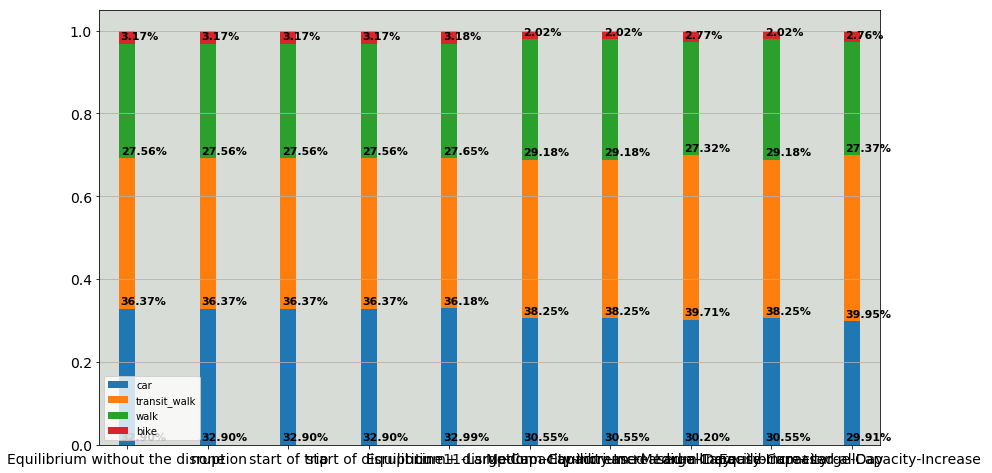

In [41]:
#Colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_modeshare_allagent_WD_swap.div(df_modeshare_allagent_WD_swap.sum(1), axis=0)).plot(kind='bar',
            stacked = True, figsize=(14,8),width = 0.2,edgecolor=None)
ax.yaxis.grid(True)
ax.set_facecolor('xkcd:light gray')
plt.legend(labels=df_modeshare_allagent_WD_swap.columns,fontsize= 14)
plt.legend(loc='best')
plt.xticks(rotation=0, horizontalalignment="center")
#plt.title("Percentage of mode choice analysis in scenarios for all agents",fontsize= 16)

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks(fontsize=14)



# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.2%}'.format(height), (x + 0.02, y +  0.01),fontsize=11,weight = 'bold')
    
plt.savefig("Percentage of mode choice analysis in scenarios for all agents.pdf")    

fig, axes = plt.subplots(4, 4, figsize=(11, 13))

for i, (idx, row) in enumerate(df_modeshare_allagent_WD_swap.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.1)
fig.savefig('modeShare_WholeDay_AllAgents_category.pdf')

df_modeshare_allagent_WD_swap.drop(['start of disruption','lineTen_ca', 'lineTen_Schedule',
                                    'IncCap', 'IncCap_20','line11','start of trip','no information'], inplace=True)

fig, axes = plt.subplots(4, 3, figsize=(11, 13))

for i, (idx, row) in enumerate(df_modeshare_allagent_WD_swap.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, labels=row.index, startangle=30)
    ax.set_title(idx)

fig.subplots_adjust(wspace=.1)
fig.savefig('modeShare_WholeDay_AllAgents_EquiScenarios.pdf')

In [42]:
df_percentage_allagents = df_modeshare_allagent_WD_swap.div(df_modeshare_allagent_WD_swap.sum(axis=1), axis=0).mul(100).round(2)
df_percentage_allagents

mode,car,transit_walk,walk,bike
Equilibrium without the disruption,32.90,36.37,27.56,3.17
none,32.90,36.37,27.56,3.17
start of trip,32.90,36.37,27.56,3.17
start of disruption,32.90,36.37,27.56,3.17
Equilibrium+ disruption,32.99,36.18,27.65,3.18
Line11-Large-Capacity-Increased,30.55,38.25,29.18,2.02
Medium-Capacity-Increased-allDay,30.55,38.25,29.18,2.02
Equilibrium+Medium-Increase-Capacity,30.20,39.71,27.32,2.77
Large-Capacity-Increased-allDay,30.55,38.25,29.18,2.02
Equilibrium+Large-Capacity-Increase,29.91,39.95,27.37,2.76


In [44]:
df_percentage_allagents.to_excel("ModeShare_Trip_percentage_all Agents.xlsx")

In [ ]:
df_percentage_allagents[]

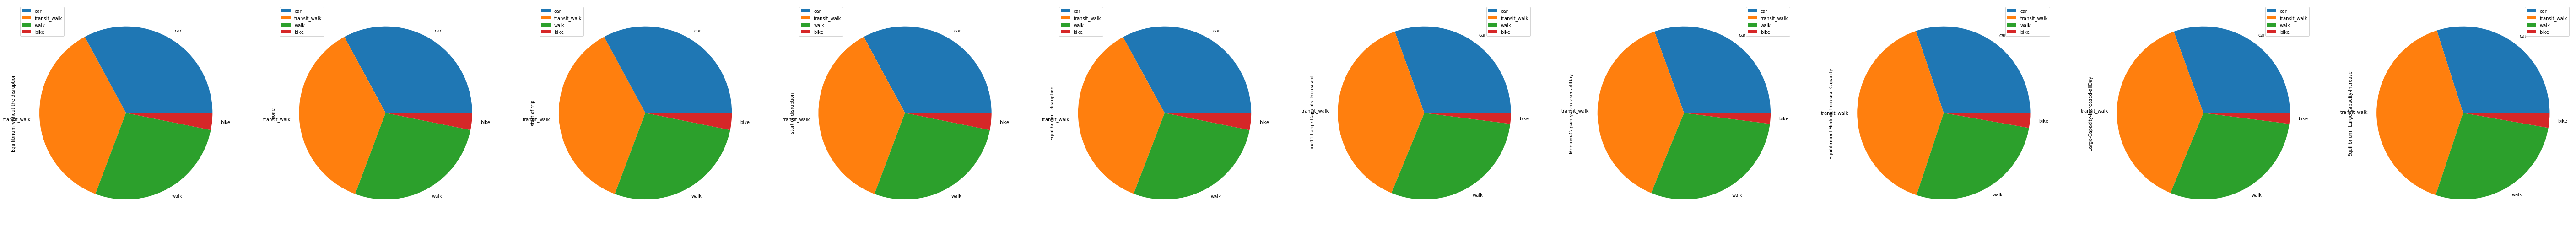

In [49]:
plot = df_percentage_allagents_swap.plot.pie(subplots=True, figsize=(100,60))
plt.savefig('modeShare_trip_AllAgents__Quaibrucke.pdf')

NameError: name 'wedges' is not defined

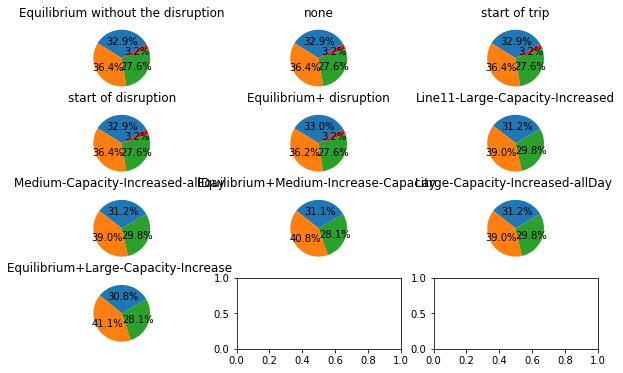

In [79]:
fig, axes = plt.subplots(4, 3, figsize=(10, 6))

for i, (idx, row) in enumerate(df_percentage_allagents.iterrows()):
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .03)]
    ax.pie(row, labels=row.index, autopct='%1.1f%%',startangle=30)
    ax.set_title(idx)

fig.legend(('car','transit_walk','walk','bike'), prop={'size': 8}, title = 'Scenarios')
fig.subplots_adjust(wspace=3)

IndexError: index 10 is out of bounds for axis 0 with size 10

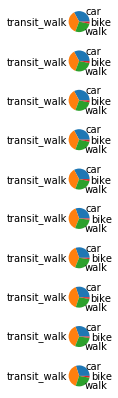

In [76]:
df= df_percentage_allagents.div(df_percentage_allagents.sum(axis=1), axis=0)

fig, axs = plt.subplots(nrows=df.index.size, ncols=1, figsize=(7,7))

fig.subplots_adjust(hspace=0.5, wspace=0.05)

for row in range(df.index.size + 1):
    fig.add_subplot(axs[row] )
    plt.pie(df.loc[df.index[row],:], labels=df.columns)
    plt.axis('off')

In [ ]:
df_percentage.to_excel("df_percentage_ptDetailed_affected Agents.xlsx")

In [ ]:
Colors_list = ['#5cb85c','#5bc0de','#d9534f']

# Change this line to plot percentages instead of absolute values
ax = (df_df_modeshare_affectedAgent_WD_new_reduced.div(df_df_modeshare_affectedAgent_WD_new_reduced.sum(1), axis=0)).plot(kind='bar',
            stacked = True, figsize=(10,10),width = 0.4,edgecolor=None)
ax.yaxis.grid(True)
ax.set_facecolor('xkcd:light gray')
plt.legend(labels=df_df_modeshare_affectedAgent_WD_new_reduced.columns,fontsize= 10)
plt.legend(loc='best')
plt.xticks(rotation=0, horizontalalignment="center")
#plt.title("Percentage of mode choice analysis in scenarios for directly affected agents \n")   

plt.xticks(fontsize=14)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
plt.yticks(fontsize=14)


# Add this loop to add the annotations
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.2%}'.format(height), (x + 0.05, y +  0.01),fontsize=10,weight = 'bold')
    
plt.savefig("Percentage of mode choice analysis in scenarios for directly affected agents.pdf")       

# Filtering the time

In [ ]:
for key, scenario in zip(keys,scenarios):

    scenario.drop(scenario[scenario['Time_'+key] < 57600.0].index, inplace=True)
    scenario.reset_index(inplace = True)


df_benchmark.head()

In [ ]:
modeshare_affectedAgent_after4=pd.DataFrame()

for key, scenario in zip(keys,scenarios):
    modeshare_affectedAgent_after4[key] = scenario["ActivityType_"+key]
    
modeshare_affectedAgent_after4.head()

In [ ]:
df_modeshare_affectedAgent_after4=pd.DataFrame()
for column in modeshare_allagent_WD:
    df_modeshare_affectedAgent_after4[column] = modeshare_affectedAgent_after4[column].value_counts()
    
df_modeshare_affectedAgent_after4

df_modeshare_affectedAgent_after4=df_modeshare_affectedAgent_after4[["EOD",'EWD','IncCap_100_equi','IncCap_20_equi']]

df_modeshare_affectedAgent_after4.drop(['pt'], inplace=True)
df_modeshare_affectedAgent_after4.to_excel("modeShare_after4_140Agents.xlsx")

plot = df_modeshare_affectedAgent_after4.plot.pie(subplots=True, figsize=(17, 8))
plt.savefig('df_modeshare_affectedAgent_after4.pdf')

# Plotting

# further code

In [ ]:
#iterate over rows and to change the specific columns
for i, row in modeshare.iterrows():
    for key in  ['EOD','EWD','start of disruption','lineTen_ca','lineTen_Schedule','IncCap','IncCap_100_equi',
                'IncCap_20','IncCap_20_equi','line11','start of trip','no information']:
        #if row[scenario] < row["Time_bench"]:
        if  modeshare.loc[i,key]== "leg":
            #row[scenario] = row["Time_bench"]
            modeshare.loc[i,key] = "pt"
    
modeshare.head()

In [ ]:
modeshare.groupby('EOD')["EOD"].count()

In [ ]:
df_modeshare=pd.DataFrame()
for column in modeshare:
    df_modeshare[column] = modeshare[column].value_counts()
    
df_modeshare    

In [ ]:
modeshare_limites = modeshare[modeshare[""]]

In [ ]:
df_modeshare.to_excel("modeShare.xlsx")

In [ ]:
df_both = df_benchmark.append(df_reactive)
df_both[df_both["personId"] == "1350253300"]

In [ ]:
df_merge[df_merge["personId"] == "1350253300"]